In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from datetime import datetime,date


transaction = pd.read_csv("transactions.csv")
products = pd.read_csv("products.csv")
customers = pd.read_csv("customers.csv")
chifre_affaires = pd.read_csv("chifre_affaires.csv")
transactions_customers =pd.read_csv("transactions_customers.csv")

# Analyse dans DF products

In [3]:
products.head(5)


,id_prod,prix,categ_prod,category_produits
0,0_1421,19.99,0,livre
1,0_1368,5.13,0,livre
2,0_731,17.99,0,livre
3,1_587,4.99,1,decoration
4,0_1507,3.99,0,livre


In [4]:
# avec methode describe on voit 
# prix min est 0.62   
# prix max est 300 
# mean prix est 21.86
# standard deviation est 29.85


products.describe().T

,count,mean,std,min,25%,50%,75%,max
prix,3286.0,21.863597,29.849786,0.62,6.99,13.075,22.99,300.0
categ_prod,3286.0,0.370359,0.615446,0.00,0.00,0.000,1.00,2.0


In [5]:
# on trouve ici que la  categorie qui est la plus frequante c'est livre(categ 0)
products['category_produits'].value_counts()

livre              2308
decoration          739
loisir_creatifs     239
Name: category_produits, dtype: int64

In [6]:
#  avec describe on voit 
# le premier place category livre
# la fréquence de la valeur la plus courante


products['category_produits'].describe()

count      3286
unique        3
top       livre
freq       2308
Name: category_produits, dtype: object

In [7]:
# frequence des prix 
# le prix 4.99 est plus frequente

products['prix'].value_counts()

4.99     85
6.99     84
3.99     80
5.99     78
8.99     74
         ..
20.91     1
4.14      1
12.88     1
7.33      1
1.15      1
Name: prix, Length: 1454, dtype: int64

In [8]:
# Avec value_counts pour colonne prix  on vois que produis qui ont prix 4.99 il sont plus nomberuse 2.58%

products['prix'].value_counts(normalize=True)*100

4.99     2.586732
6.99     2.556299
3.99     2.434571
5.99     2.373707
8.99     2.251978
           ...   
20.91    0.030432
4.14     0.030432
12.88    0.030432
7.33     0.030432
1.15     0.030432
Name: prix, Length: 1454, dtype: float64

Text(0, 0.5, 'Frequence')

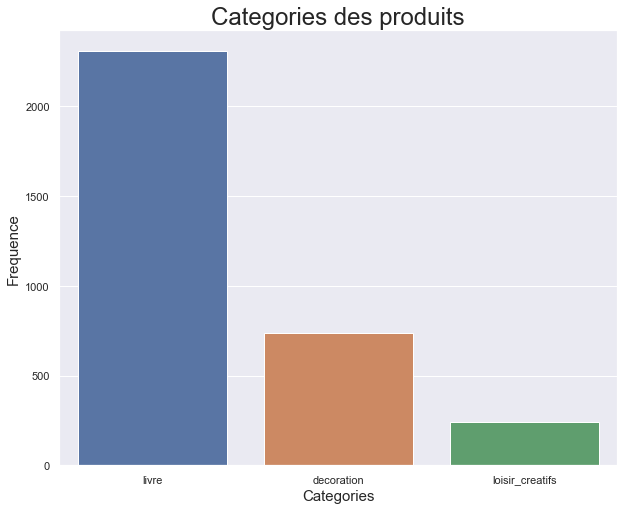

In [9]:
 # Categorie de livre a été la plus choisie
sns.set(rc={"figure.figsize":(10, 8)})

category_products = products['category_produits'].value_counts()
ax=sns.barplot(x=category_products.index, y=category_products.values).set_title('Categories des produits',fontdict= { 'fontsize': 24});

plt.xlabel("Categories",fontdict= { 'fontsize': 15})
plt.ylabel("Frequence",fontdict= { 'fontsize': 15})



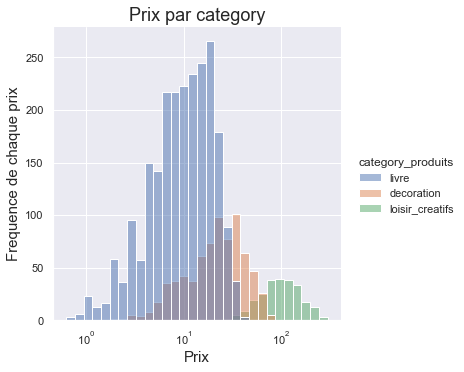

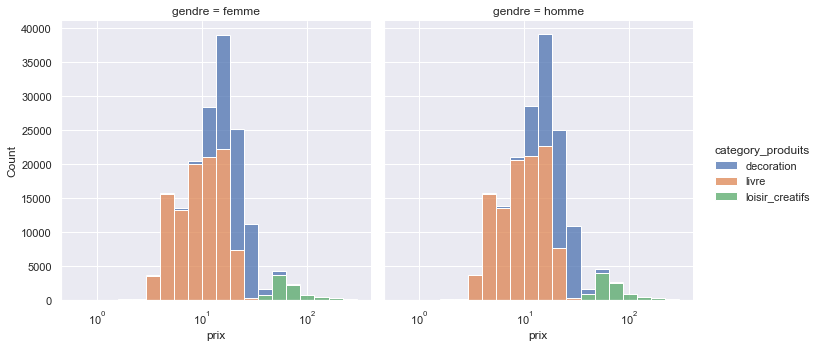

In [10]:
# displot/histogram prix par category et l'achat par genre

sns.set(rc={"figure.figsize":(10, 8)})

sns.displot(products, x="prix", hue="category_produits", log_scale=True, bins=30);
plt.title('Prix par category', fontsize=18)
plt.xlabel("Prix",fontdict= { 'fontsize': 15})
plt.ylabel("Frequence de chaque prix",fontdict= { 'fontsize': 15});

sns.displot(data=transactions_customers, x="prix", hue="category_produits", col="gendre" , log_scale=True, bins=20,multiple="stack")

In [11]:
# somme colonne Prix 71842.78

products['prix'].sum()

71843.78

## Dans df products on vois que :

- la categorie livre est la plus demandée ( category 0) - 70% 
- les valeurs maximale dans le prix c'est 300 euro et minimale est 0.62 centimes
- mean value est 21.86
- dans le graphique Categroies de produits le livre est 2308 fois plus frequante 
- et en  displot/histogramme je compare  categories avec le prix - le livre est 300 euro max, le loisir créatif jusqu'à 100 euro et la decoration est moins 50 euro 

# Analyse DF customers

In [12]:
customers.head()

,client_id,gendre,annee_de_naissance,age,tranche_de_age,classement_age
0,c_4410,femme,1967,54,"(50,69]",3-Cinq_Senior
1,c_7839,femme,1975,46,"(30,49]",2-Adulte
2,c_1699,femme,1984,37,"(30,49]",2-Adulte
3,c_5961,femme,1962,59,"(50,69]",3-Cinq_Senior
4,c_5320,homme,1943,78,"(70,70+]",4-Senior


In [13]:
# avec methode describe  
# mean value est 1978 annee de naissance/ mean est 42 age de client
# min age 17 et 1929 annee de naissance
# max 92 age et max annee de naissance est 2004

customers.describe().T

,count,mean,std,min,25%,50%,75%,max
annee_de_naissance,8623.0,1978.280877,16.919535,1929.0,1966.0,1979.0,1992.0,2004.0
age,8623.0,42.719123,16.919535,17.0,29.0,42.0,55.0,92.0


In [14]:
# dans le colonne tranche de age on voit que le plus frequante clients ont 30-49 age

customers['tranche_de_age'].value_counts()

(30,49]     3366
(50,69]     2397
(17,29]     2282
(70,70+]     578
Name: tranche_de_age, dtype: int64

Text(0.5, 1.0, "Distribution clients - Tranche d'age %")

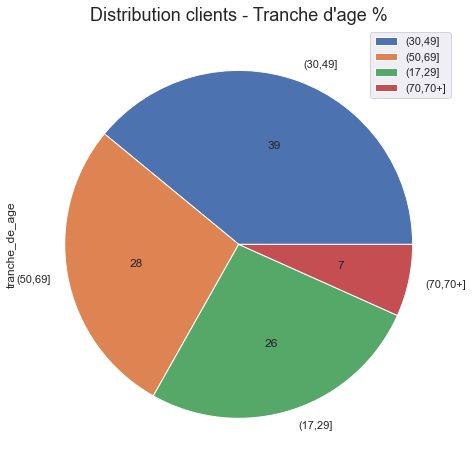

In [15]:
# dans le colonne tranche de age on voit que le plus frequante clients ont 30-49 age - precent

ax = (customers['tranche_de_age'].value_counts(normalize=True)*100).plot(kind='pie', autopct='%.0f',legend=True)
ax.set_title("Distribution clients - Tranche d'age %", fontsize=18)

39 % clients de 30 ans - 49 ans

6.70% clients de 70 ans et plus

Text(0, 0.5, 'Nombre de clients')

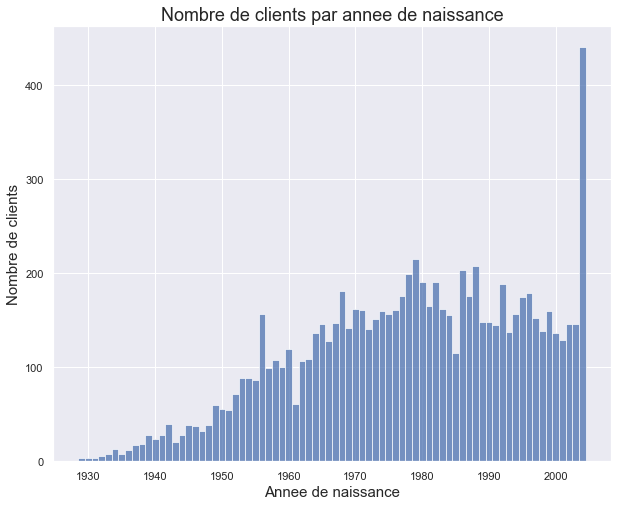

In [16]:
# # le majorite des clients a 18 ans
plt.title('Nombre de clients par annee de naissance', fontsize=18)
sns.histplot(customers['annee_de_naissance'],stat="count",discrete=True)
plt.xlabel("Annee de naissance",fontdict= { 'fontsize': 15})
plt.ylabel("Nombre de clients",fontdict= { 'fontsize': 15})


Le majorite des clients avec 18 ans c'esa a cause de registration ( tous doivent avoir 18 ans )

In [17]:
# avec methode qcut esseyage d'avoir tranche de'age
customers['categories_annee'] = pd.qcut(customers['annee_de_naissance'],5)
customers

,client_id,gendre,annee_de_naissance,age,tranche_de_age,classement_age,categories_annee
0,c_4410,femme,1967,54,"(50,69]",3-Cinq_Senior,"(1963.0, 1975.0]"
1,c_7839,femme,1975,46,"(30,49]",2-Adulte,"(1963.0, 1975.0]"
2,c_1699,femme,1984,37,"(30,49]",2-Adulte,"(1975.0, 1984.0]"
3,c_5961,femme,1962,59,"(50,69]",3-Cinq_Senior,"(1928.999, 1963.0]"
4,c_5320,homme,1943,78,"(70,70+]",4-Senior,"(1928.999, 1963.0]"
...,...,...,...,...,...,...,...
8618,c_7920,homme,1956,65,"(50,69]",3-Cinq_Senior,"(1928.999, 1963.0]"
8619,c_7403,femme,1970,51,"(50,69]",3-Cinq_Senior,"(1963.0, 1975.0]"
8620,c_5119,homme,1974,47,"(30,49]",2-Adulte,"(1963.0, 1975.0]"
8621,c_5643,femme,1968,53,"(50,69]",3-Cinq_Senior,"(1963.0, 1975.0]"


In [18]:
# avec methode cut esseyage d'avoir tranche de'age

customers['tranche_de_age_'] = pd.cut(customers['age'], bins=[0,19, 29,39, 49,59, np.inf])
customers

,client_id,gendre,annee_de_naissance,age,tranche_de_age,classement_age,categories_annee,tranche_de_age_
0,c_4410,femme,1967,54,"(50,69]",3-Cinq_Senior,"(1963.0, 1975.0]","(49.0, 59.0]"
1,c_7839,femme,1975,46,"(30,49]",2-Adulte,"(1963.0, 1975.0]","(39.0, 49.0]"
2,c_1699,femme,1984,37,"(30,49]",2-Adulte,"(1975.0, 1984.0]","(29.0, 39.0]"
3,c_5961,femme,1962,59,"(50,69]",3-Cinq_Senior,"(1928.999, 1963.0]","(49.0, 59.0]"
4,c_5320,homme,1943,78,"(70,70+]",4-Senior,"(1928.999, 1963.0]","(59.0, inf]"
...,...,...,...,...,...,...,...,...
8618,c_7920,homme,1956,65,"(50,69]",3-Cinq_Senior,"(1928.999, 1963.0]","(59.0, inf]"
8619,c_7403,femme,1970,51,"(50,69]",3-Cinq_Senior,"(1963.0, 1975.0]","(49.0, 59.0]"
8620,c_5119,homme,1974,47,"(30,49]",2-Adulte,"(1963.0, 1975.0]","(39.0, 49.0]"
8621,c_5643,femme,1968,53,"(50,69]",3-Cinq_Senior,"(1963.0, 1975.0]","(49.0, 59.0]"


In [19]:
# 17 ans les clients moins agée et 92 les clients plus agée

customers.sort_values(by='age')

,client_id,gendre,annee_de_naissance,age,tranche_de_age,classement_age,categories_annee,tranche_de_age_
1920,c_3923,femme,2004,17,"(17,29]",1-Jeune Adulte,"(1995.0, 2004.0]","(0.0, 19.0]"
7318,c_1358,femme,2004,17,"(17,29]",1-Jeune Adulte,"(1995.0, 2004.0]","(0.0, 19.0]"
1045,c_7765,homme,2004,17,"(17,29]",1-Jeune Adulte,"(1995.0, 2004.0]","(0.0, 19.0]"
1049,c_3004,homme,2004,17,"(17,29]",1-Jeune Adulte,"(1995.0, 2004.0]","(0.0, 19.0]"
1053,c_3329,homme,2004,17,"(17,29]",1-Jeune Adulte,"(1995.0, 2004.0]","(0.0, 19.0]"
...,...,...,...,...,...,...,...,...
1086,c_3218,femme,1930,91,"(70,70+]",4-Senior,"(1928.999, 1963.0]","(59.0, inf]"
3994,c_4679,femme,1930,91,"(70,70+]",4-Senior,"(1928.999, 1963.0]","(59.0, inf]"
4569,c_577,homme,1929,92,"(70,70+]",4-Senior,"(1928.999, 1963.0]","(59.0, inf]"
2491,c_8362,femme,1929,92,"(70,70+]",4-Senior,"(1928.999, 1963.0]","(59.0, inf]"


In [20]:
# frequence de clients dans "tranche_de_age"

scatter = customers["tranche_de_age"].value_counts()
modalites = scatter.index

In [21]:
# frequence de clients dans "tranche_de_age" dans DataFrame
scat_plot = pd.DataFrame(modalites, columns = ["client_id"])

In [22]:
# Ajoute colonne total client

scat_plot["total_client"] = scatter.values
scat_plot

,client_id,total_client
0,"(30,49]",3366
1,"(50,69]",2397
2,"(17,29]",2282
3,"(70,70+]",578


Text(0.5, 1.0, 'Clients / Tranche age')

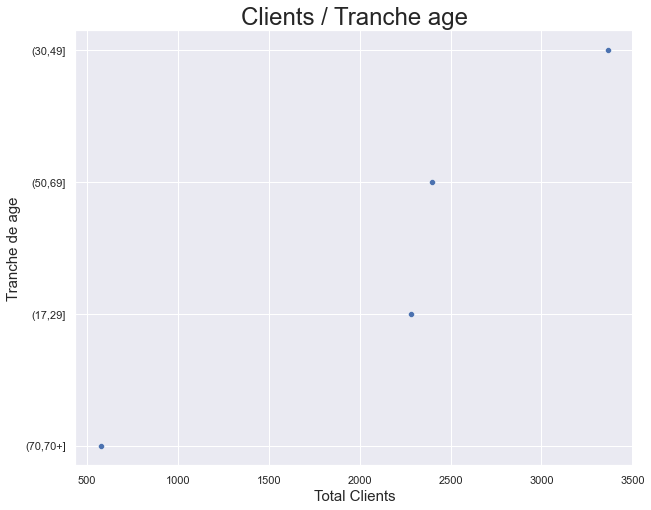

In [23]:
# Scatterplot nb clients par tranche d'age


plt.xlabel("Total Clients",fontdict= { 'fontsize': 15})
plt.ylabel("Tranche de age",fontdict= { 'fontsize': 15});

sns.scatterplot(x='total_client', y='client_id', data=scat_plot)
plt.title("Clients / Tranche age", size=24)


Corrélation positive perfect. Si un variable augmente et le deuxieme variable va augmenter 



In [24]:
scat_plot.corr()

,total_client
total_client,1.0


(<AxesSubplot:xlabel='annee_de_naissance', ylabel='client_id'>,
 <AxesSubplot:xlabel='annee_de_naissance', ylabel='client_id'>)

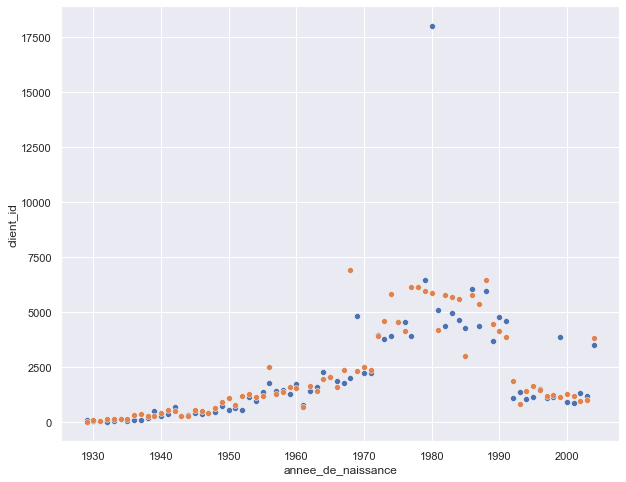

In [25]:
f_annee_count = transactions_customers[ transactions_customers.gendre=='femme'].groupby('annee_de_naissance').agg('count').client_id
m_annee_count =  transactions_customers[ transactions_customers.gendre=='homme'].groupby('annee_de_naissance').agg('count').client_id
(sns.scatterplot(data= m_annee_count),
 sns.scatterplot(data =f_annee_count))

Outliers _  Et ici on vois qu'il y a environ 18000 hommes clients née 1980 

Text(0.5, 1.0, 'Classement_age/Gendre par Annee de naissance')

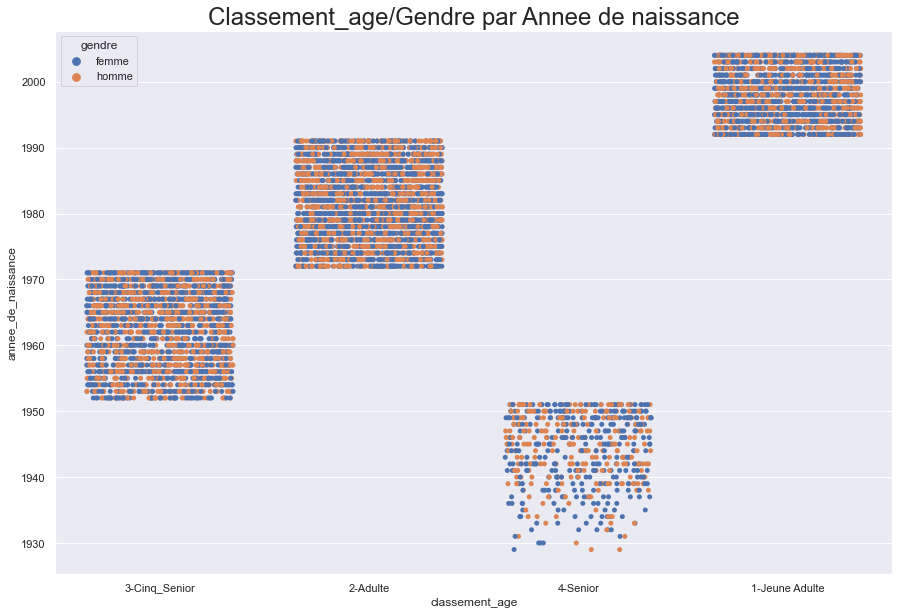

In [26]:
sns.set(rc={"figure.figsize":(15, 10)})

sns.stripplot(x='classement_age', y='annee_de_naissance', hue='gendre', data=customers,jitter=0.35);
plt.title("Classement_age/Gendre par Annee de naissance", size=24)

Text(0.5, 1.0, 'Tranche age/Gendre par Annee de naissance')

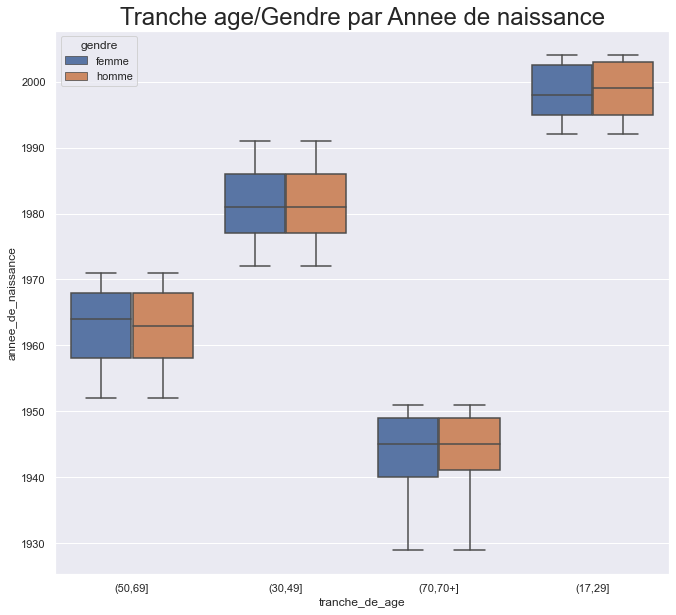

In [27]:
sns.set(rc={"figure.figsize":(11, 10)})

sns.boxplot(x='tranche_de_age', y='annee_de_naissance', hue='gendre', 
            data=customers).set(title='Tranche Age/Gendre per Annee de naissance')


plt.title("Tranche age/Gendre par Annee de naissance", size=24)



Dans le graphic "Tranche age/Gendre par annee de naissance 

- annee de naissance  des femmes et des hommes dans tranche d'age 50-69 c'est min 1952 et max 1971( coment j'ai defini ), mais on voit que chez femme median est 1964 , chez les hommes 1963

- annee de naissance  des femmes et des hommes dans tranche d'age 30-49 c'est min 1972 et max 1991( coment j'ai defini ), mais on voit que chez femme median est 1981 , chez les hommes 1982 

- annee de naissance  des femmes et des hommes dans tranche d'age 70-70+ c'est min 1929 et max 1951( coment j'ai defini ), mais on voit que chez femme median est 1945 , chez les hommes 1945 

- annee de naissance  des femmes et des hommes dans tranche d'age 17-29 c'est min 1992 et max 2004( coment j'ai defini ), mais on voit que chez femme median est 1998 , chez les hommes 1999 

Text(0.5, 1.0, 'Category de produits par prix')

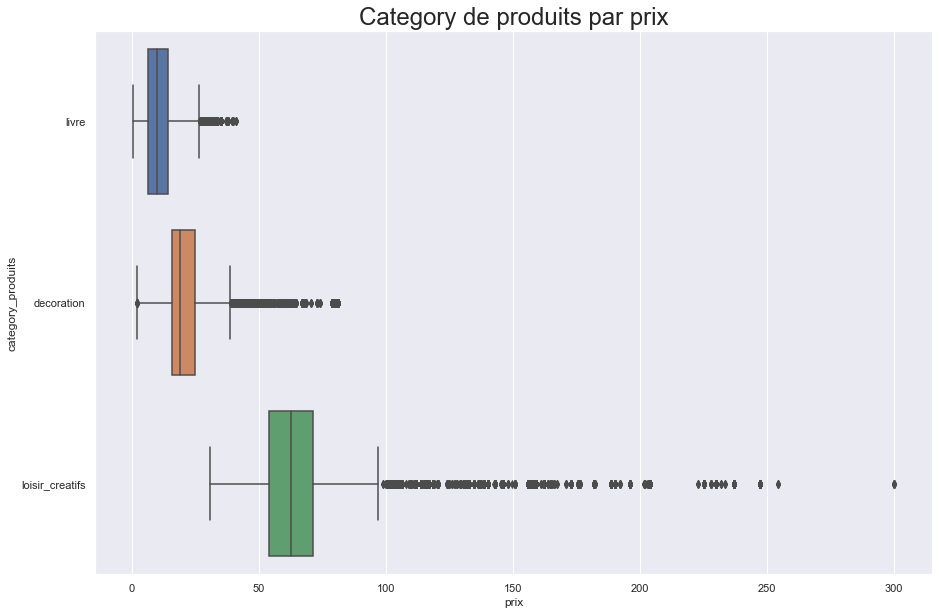

In [28]:
sns.set(rc={"figure.figsize":(15, 10)})

sns.boxplot(x='prix', y='category_produits', data=chifre_affaires);
plt.title("Category de produits par prix", size=24)

## Dans le graphic "Category des produits par prix"

- livre minimale valeur est 0 est maximale est 40, median vers 10 
- decoration minimale valeur est vers 0 est maximale est environ 80, median vers 21
- loisir_creatifs minimale valeur est vers 30 est maximale est 300 , median vers 70



Dans la categorie livre il y prx de produit plus bas et pour ça c'est la plus visite category des produits

Text(0.5, 1.0, "Frequence d'achat par classement age et gendre ")

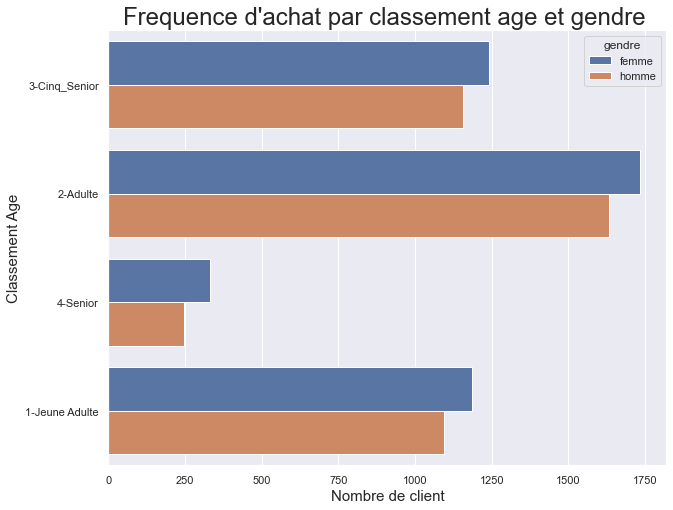

In [29]:
# Barplot 

sns.set(rc={"figure.figsize":(10, 8)})
sns.countplot(y='classement_age', hue='gendre',data=customers);
sns.set(rc={"figure.figsize":(15, 10)})

plt.xlabel("Nombre de client",fontdict= { 'fontsize': 15})
plt.ylabel("Classement Age",fontdict= { 'fontsize': 15})

plt.title("Frequence d'achat par classement age et gendre ", size=24)

On observe que classement Senior est minimale avec 330 femme et 249 homme
On observe que classement Adulte est maximale avec environ 1700 femme et environ 1600 homme

Text(0.5, 1.0, "Gendre-age  par tranche d'age ")

<Figure size 1080x720 with 0 Axes>

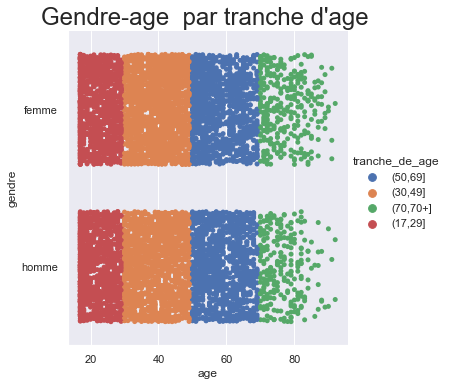

In [30]:
plt.figure(figsize=(15,10))

sns.catplot(x='age', y='gendre',hue='tranche_de_age', data=customers, jitter = '0.35')

plt.title("Gendre-age  par tranche d'age ", size=24)

In [31]:
# on voit que 2004 annee de naissance c'est max /plus apparaître 
                                                                     
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
annee_de_naissance,8623.0,1978.280877,16.919535,1929.0,1966.0,1979.0,1992.0,2004.0
age,8623.0,42.719123,16.919535,17.0,29.0,42.0,55.0,92.0


In [32]:
# frequence des clients par annee de naissance 
# 440 clients sont néé 2004

customers['annee_de_naissance'].value_counts()

2004    440
1979    215
1988    207
1986    203
1978    199
       ... 
1935      8
1932      6
1930      4
1931      4
1929      3
Name: annee_de_naissance, Length: 76, dtype: int64

## Avec analyse dans df customers je trouve

- le plus agee personne (client ) a 92 ans, et moins agee a 17 ans
- enfait nous avons pic que il y a beaucoup personne avec annee 2004 (18 ans peut-etre pour achat/entre sur site on doit avoir 18 ans)440 personne et ensuite des personnes de 1979
- On voit que nous avons plus des femmes comme client , 52% et 48% homme ( ce n'est pas tres grand diference )

In [33]:
statistics = pd.DataFrame(chifre_affaires.describe().T)
statistics

,count,mean,std,min,25%,50%,75%,max
prix,336816.0,17.216609,17.852900,0.62,8.61,13.94,18.99,300.0
categ_prod,336816.0,0.430330,0.591075,0.00,0.00,0.00,1.00,2.0
an_de_vente,336816.0,2021.174822,0.379816,2021.00,2021.00,2021.00,2021.00,2022.0
m_de_vente,336816.0,6.482133,3.519807,1.00,3.00,6.00,9.00,12.0
j_de_vente,336816.0,15.801628,8.818357,1.00,8.00,16.00,23.00,31.0
h_de_vente,336816.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0
min_de_vente,336816.0,29.481533,17.329827,0.00,14.00,29.00,45.00,59.0
sec_de_vente,336816.0,29.503171,17.311572,0.00,15.00,30.00,44.00,59.0


In [34]:
# corr() correlation entre deux colonnes


chifre_affaires.corr().fillna(0)

,prix,categ_prod,an_de_vente,m_de_vente,j_de_vente,h_de_vente,min_de_vente,sec_de_vente
prix,1.000000,0.673333,0.018513,-0.023022,0.000928,0.0,0.001793,-0.001278
categ_prod,0.673333,1.000000,0.054300,-0.036426,0.001814,0.0,0.000255,-0.000737
an_de_vente,0.018513,0.054300,1.000000,-0.651233,-0.033136,0.0,0.000034,0.000335
m_de_vente,-0.023022,-0.036426,-0.651233,1.000000,0.030387,0.0,-0.001801,-0.001704
j_de_vente,0.000928,0.001814,-0.033136,0.030387,1.000000,0.0,-0.000418,0.000366
h_de_vente,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
min_de_vente,0.001793,0.000255,0.000034,-0.001801,-0.000418,0.0,1.000000,-0.000580
sec_de_vente,-0.001278,-0.000737,0.000335,-0.001704,0.000366,0.0,-0.000580,1.000000


-1 : Une corrélation négative totale. Cela signifie que si une variable augmente, l'autre variable diminue et elles sont totalement corrélées.

0 : Pas de corrélation du tout. Cela signifie que les deux variables ne sont pas du tout dépendantes. Si l'une augmente, vous ne pouvez pas prédire avec une quelconque probabilité ce qui va arriver à l'autre. Les valeurs plus proches de zéro signifient qu'il n'y a pas de tendance linéaire entre les deux variables.

1 : Une corrélation complète. Cela signifie que si l'une des variables augmente, l'autre augmentera également.



In [35]:
CA = chifre_affaires['prix'].sum()
print('Chifre des affaires {}'.format(CA))

Chifre des affaires 5798829.350000002


In [36]:
chifre_affaires

,id_prod,prix,categ_prod,category_produits,date,session_id,client_id,Date,an_de_vente,m_de_vente,j_de_vente,Time,h_de_vente,min_de_vente,sec_de_vente
0,0_1421,19.99,0,livre,26:29.9,s_33709,c_7954,12/05/2021,2021,5,12,26:29.9,0,26,29
1,0_1421,19.99,0,livre,27:39.4,s_154957,c_254,25/01/2022,2022,1,25,27:39.4,0,27,39
2,0_1421,19.99,0,livre,29:33.8,s_144068,c_5770,02/01/2022,2022,1,2,29:33.8,0,29,33
3,0_1421,19.99,0,livre,10:40.3,s_2187,c_1455,05/03/2021,2021,3,5,10:40.3,0,10,40
4,0_1421,19.99,0,livre,55:04.4,s_13112,c_2768,29/03/2021,2021,3,29,55:04.4,0,55,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336811,0_2245,21.86,1,decoration,59:19.5,s_16936,c_4167,06/04/2021,2021,4,6,59:19.5,0,59,19
336812,0_2245,21.86,1,decoration,29:02.3,s_13738,c_7790,30/03/2021,2021,3,30,29:02.3,0,29,2
336813,0_2245,21.86,1,decoration,14:40.4,s_128815,c_6189,03/12/2021,2021,12,3,14:40.4,0,14,40
336814,0_2245,21.86,1,decoration,58:47.7,s_26624,c_1595,27/04/2021,2021,4,27,58:47.7,0,58,47


In [37]:
chifre_affaires = pd.DataFrame(chifre_affaires)
chifre_affaires 

,id_prod,prix,categ_prod,category_produits,date,session_id,client_id,Date,an_de_vente,m_de_vente,j_de_vente,Time,h_de_vente,min_de_vente,sec_de_vente
0,0_1421,19.99,0,livre,26:29.9,s_33709,c_7954,12/05/2021,2021,5,12,26:29.9,0,26,29
1,0_1421,19.99,0,livre,27:39.4,s_154957,c_254,25/01/2022,2022,1,25,27:39.4,0,27,39
2,0_1421,19.99,0,livre,29:33.8,s_144068,c_5770,02/01/2022,2022,1,2,29:33.8,0,29,33
3,0_1421,19.99,0,livre,10:40.3,s_2187,c_1455,05/03/2021,2021,3,5,10:40.3,0,10,40
4,0_1421,19.99,0,livre,55:04.4,s_13112,c_2768,29/03/2021,2021,3,29,55:04.4,0,55,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336811,0_2245,21.86,1,decoration,59:19.5,s_16936,c_4167,06/04/2021,2021,4,6,59:19.5,0,59,19
336812,0_2245,21.86,1,decoration,29:02.3,s_13738,c_7790,30/03/2021,2021,3,30,29:02.3,0,29,2
336813,0_2245,21.86,1,decoration,14:40.4,s_128815,c_6189,03/12/2021,2021,12,3,14:40.4,0,14,40
336814,0_2245,21.86,1,decoration,58:47.7,s_26624,c_1595,27/04/2021,2021,4,27,58:47.7,0,58,47


In [38]:
transactions_customers.describe().T

,count,mean,std,min,25%,50%,75%,max
annee_de_naissance,336816.0,1977.823396,13.523923,1929.00,1971.00,1980.00,1987.00,2004.0
age,336816.0,43.176604,13.523923,17.00,34.00,41.00,50.00,92.0
prix,336816.0,17.216609,17.852900,0.62,8.61,13.94,18.99,300.0
categ_prod,336816.0,0.430330,0.591075,0.00,0.00,0.00,1.00,2.0
an_de_vente,336816.0,2021.174822,0.379816,2021.00,2021.00,2021.00,2021.00,2022.0
m_de_vente,336816.0,6.482133,3.519807,1.00,3.00,6.00,9.00,12.0
j_de_vente,336816.0,15.801628,8.818357,1.00,8.00,16.00,23.00,31.0
h_de_vente,336816.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0
min_de_vente,336816.0,29.481533,17.329827,0.00,14.00,29.00,45.00,59.0
sec_de_vente,336816.0,29.503171,17.311572,0.00,15.00,30.00,44.00,59.0


In [39]:
transactions_customers.corr().fillna(0)

,annee_de_naissance,age,prix,categ_prod,an_de_vente,m_de_vente,j_de_vente,h_de_vente,min_de_vente,sec_de_vente
annee_de_naissance,1.000000,-1.000000,0.211499,0.098575,-0.007475,-0.004646,0.001734,0.0,-0.002310,-0.001880
age,-1.000000,1.000000,-0.211499,-0.098575,0.007475,0.004646,-0.001734,0.0,0.002310,0.001880
prix,0.211499,-0.211499,1.000000,0.673333,0.018513,-0.023022,0.000928,0.0,0.001793,-0.001278
categ_prod,0.098575,-0.098575,0.673333,1.000000,0.054300,-0.036426,0.001814,0.0,0.000255,-0.000737
an_de_vente,-0.007475,0.007475,0.018513,0.054300,1.000000,-0.651233,-0.033136,0.0,0.000034,0.000335
m_de_vente,-0.004646,0.004646,-0.023022,-0.036426,-0.651233,1.000000,0.030387,0.0,-0.001801,-0.001704
j_de_vente,0.001734,-0.001734,0.000928,0.001814,-0.033136,0.030387,1.000000,0.0,-0.000418,0.000366
h_de_vente,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
min_de_vente,-0.002310,0.002310,0.001793,0.000255,0.000034,-0.001801,-0.000418,0.0,1.000000,-0.000580
sec_de_vente,-0.001880,0.001880,-0.001278,-0.000737,0.000335,-0.001704,0.000366,0.0,-0.000580,1.000000


In [40]:
#nombre des achats par gendre
nb_vente_gendre =pd.DataFrame(transactions_customers.groupby(['category_produits','gendre'])['prix'].sum().unstack('category_produits'))
nb_vente_gendre

category_produits,decoration,livre,loisir_creatifs
gendre,,,
femme,1139168.09,1103465.97,617799.31
homme,1110467.90,1126256.68,701671.40


In [44]:
# panier_moyenne par category et age de client
panier_m =pd.DataFrame(transactions_customers.groupby(['category_produits','age'])['prix'].mean().unstack('category_produits'))
panier_m


category_produits,decoration,livre,loisir_creatifs
age,,,
17,20.632443,10.563411,75.605375
18,20.529070,10.654672,75.814892
19,20.566943,11.091529,75.143147
20,20.603101,10.936226,77.185232
21,20.221540,10.727645,72.546951
...,...,...,...
88,20.445054,10.041143,49.610000
89,20.104000,11.182055,60.960000
90,20.687447,11.590556,43.350000


Text(0.5, 1.0, 'Carte de chaleur correlation  panier moyene \npar category de produit et age')

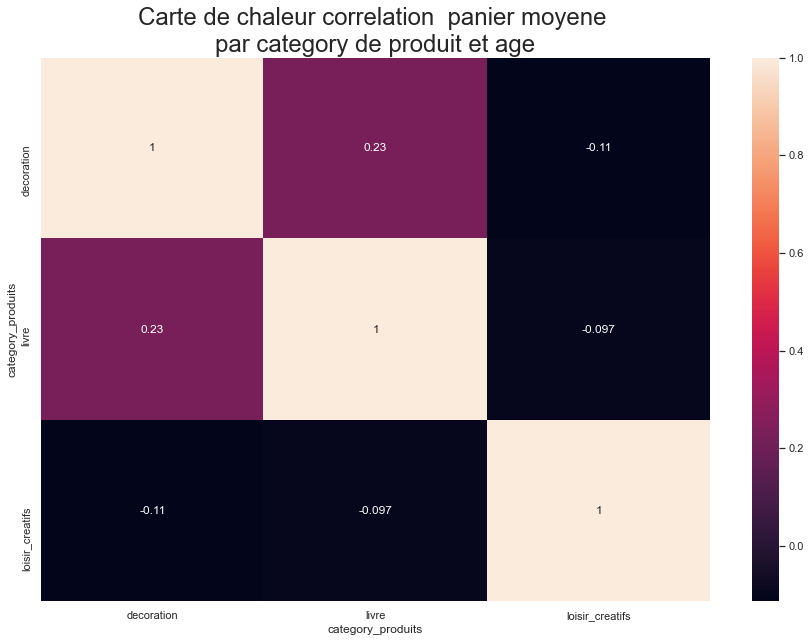

In [45]:
sns.heatmap(panier_m.corr(), annot=True)

plt.title("Carte de chaleur correlation  panier moyene \npar category de produit et age", size=24)

-0.097 il n'y pas correlation entre des varibles
-0.23 - -0.11  tres fiable correlation

In [119]:
transactions_customers

,client_id,gendre,annee_de_naissance,age,tranche_de_age,classement_age,id_prod,prix,categ_prod,category_produits,date,session_id,Date,an_de_vente,m_de_vente,j_de_vente,Time,h_de_vente,min_de_vente,sec_de_vente
0,c_4410,femme,1967,54,"(50,69]",3-Cinq_Senior,1_385,25.99,1,decoration,40:22.8,s_9707,22/03/2021,2021,3,22,40:22.8,0,40,22
1,c_4410,femme,1967,54,"(50,69]",3-Cinq_Senior,0_1110,4.71,0,livre,28:30.2,s_114715,04/11/2021,2021,11,4,28:30.2,0,28,30
2,c_4410,femme,1967,54,"(50,69]",3-Cinq_Senior,0_1111,19.99,0,livre,27:49.5,s_9707,22/03/2021,2021,3,22,27:49.5,0,27,49
3,c_4410,femme,1967,54,"(50,69]",3-Cinq_Senior,1_461,12.99,1,decoration,40:47.5,s_74236,11/08/2021,2021,8,11,40:47.5,0,40,47
4,c_4410,femme,1967,54,"(50,69]",3-Cinq_Senior,1_536,11.21,1,decoration,05:07.5,s_151740,18/01/2022,2022,1,18,05:07.5,0,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336811,c_84,femme,1982,39,"(30,49]",2-Adulte,0_1452,13.77,0,livre,11:35.5,s_92701,20/09/2021,2021,9,20,11:35.5,0,11,35
336812,c_84,femme,1982,39,"(30,49]",2-Adulte,1_158,22.17,1,decoration,11:20.8,s_98493,01/10/2021,2021,10,1,11:20.8,0,11,20
336813,c_84,femme,1982,39,"(30,49]",2-Adulte,0_1438,9.31,0,livre,11:50.3,s_141701,29/12/2021,2021,12,29,11:50.3,0,11,50
336814,c_84,femme,1982,39,"(30,49]",2-Adulte,1_459,15.99,1,decoration,16:56.6,s_166337,17/02/2022,2022,2,17,16:56.6,0,16,56


In [120]:
# Calcul avec groupby classement et category avec mois de vente 

freq_mois =pd.DataFrame(transactions_customers.groupby(['classement_age','category_produits'])['m_de_vente'].count().unstack('category_produits'))
freq_mois.reset_index()

category_produits,classement_age,decoration,livre,loisir_creatifs
0,1-Jeune Adulte,14445,8349,16136
1,2-Adulte,47526,161179,575
2,3-Cinq_Senior,39537,33108,717
3,4-Senior,8330,6790,124


Text(0.5, 1.0, 'BOXPLOT FREQUENCE ACHAT EN MOIS PAR CATEGORY')

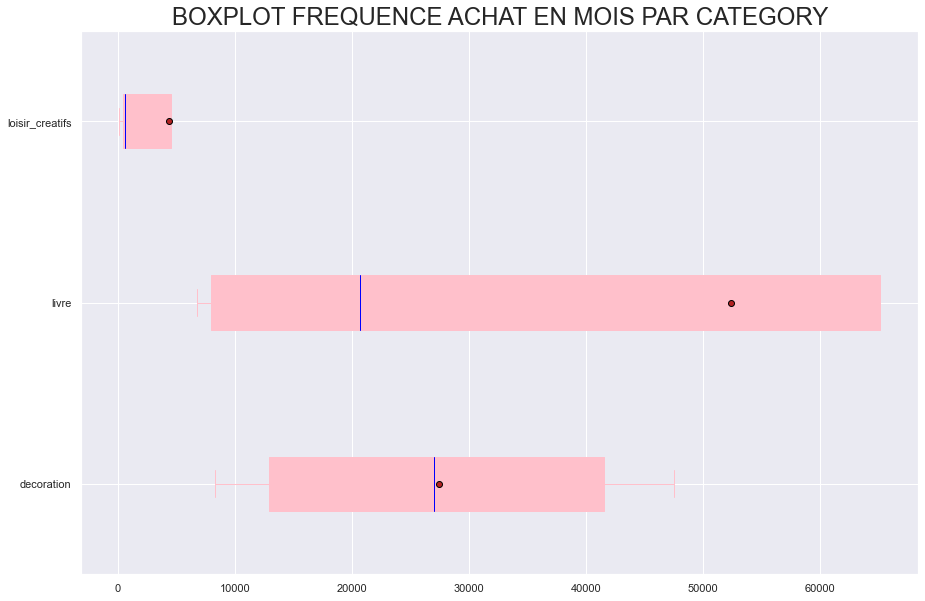

In [121]:
medianprops = {'color': "blue"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black', 'markerfacecolor': 'firebrick'}
filerprops = dict(linestyle = '_', linewidth = 3, color='black')
green_diamond = dict(markerfacecolor = 'g', marker = 'D')

freq_mois.boxplot(showfliers=False, medianprops = medianprops,
                vert= False, patch_artist=True, showmeans=True, meanprops = meanprops, flierprops=green_diamond,color='pink').set_title("BOXPLOT FREQUENCE ACHAT EN MOIS PAR CATEGORY", size=24)


In [122]:


panier_moy_classement =pd.DataFrame(transactions_customers.groupby(['classement_age','client_id'])['prix'].mean().unstack('classement_age').fillna(0))
panier_moy_classement.reset_index()

classement_age,client_id,1-Jeune Adulte,2-Adulte,3-Cinq_Senior,4-Senior
0,c_1,0.000000,0.000000,15.032500,0.0
1,c_10,0.000000,0.000000,20.935000,0.0
2,c_100,37.145000,0.000000,0.000000,0.0
3,c_1000,0.000000,0.000000,17.500357,0.0
4,c_1001,0.000000,19.007759,0.000000,0.0
...,...,...,...,...,...
8595,c_995,0.000000,0.000000,14.885000,0.0
8596,c_996,0.000000,0.000000,17.609524,0.0
8597,c_997,24.908261,0.000000,0.000000,0.0
8598,c_998,54.560357,0.000000,0.000000,0.0


Text(0.5, 1.0, 'BOXPLOT PANIER MOYEN ACHAT PAR CLASSEMENT CLIENTS')

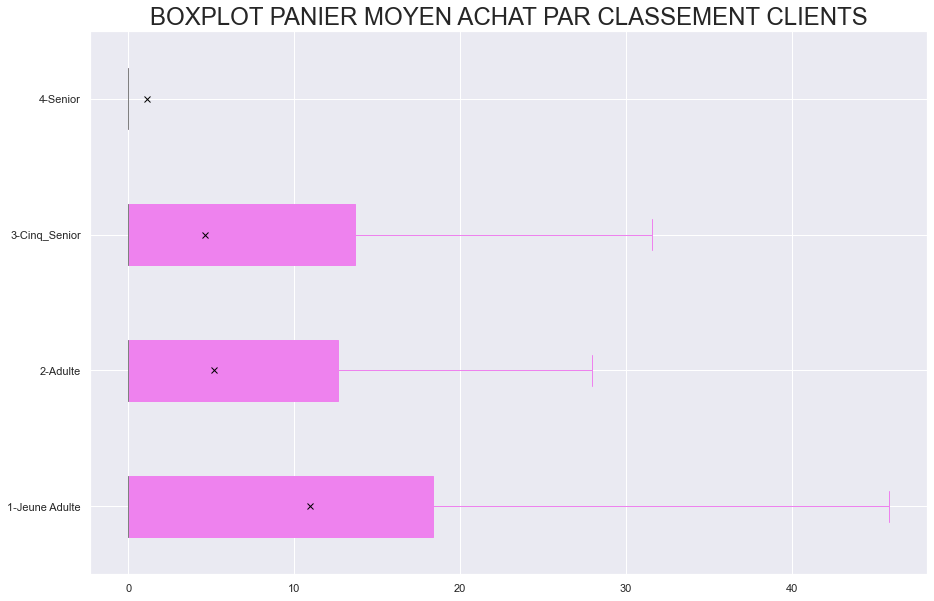

In [123]:
medianprops = {'color': "grey"}
meanprops = {'marker': 'x', 'markeredgecolor': 'black', 'markerfacecolor': 'firebrick'}
filerprops = dict(linestyle = '_', linewidth = 3, color='black')
green_diamond = dict(markerfacecolor = 'g', marker = 'D')

panier_moy_classement.boxplot(showfliers=False, medianprops = medianprops,
                vert= False, patch_artist=True, showmeans=True, meanprops = meanprops, flierprops=green_diamond,color='violet').set_title("BOXPLOT PANIER MOYEN ACHAT PAR CLASSEMENT CLIENTS", size=24)

Jeune adulte vers 12 euro ( min 0 - maximale 48 )

Adulte  vers 5 euro ( min 0 - maximale 28 euro )

Cinq_senior vers 5 euro ( min 0 - max 33 euro )

Senior vers 1-2 euro

In [124]:
# nombre des ventes par tranche de age 
# on voit que tranche d'age 17,29 interesse pour loisir_creatifs
# 30,49 pour livre
#50,69 decoration
# 70,70+ pour livre

nb_article_tranche =pd.DataFrame(transactions_customers.groupby(['tranche_de_age','category_produits'])['prix'].count().unstack('category_produits'))
nb_article_tranche

category_produits,decoration,livre,loisir_creatifs
tranche_de_age,,,
"(17,29]",14445,8349,16136
"(30,49]",47526,161179,575
"(50,69]",39537,33108,717
"(70,70+]",8330,6790,124


Text(0.5, 1.0, 'Carte de chaleur nb de article \npar category de produit et tranche de age')

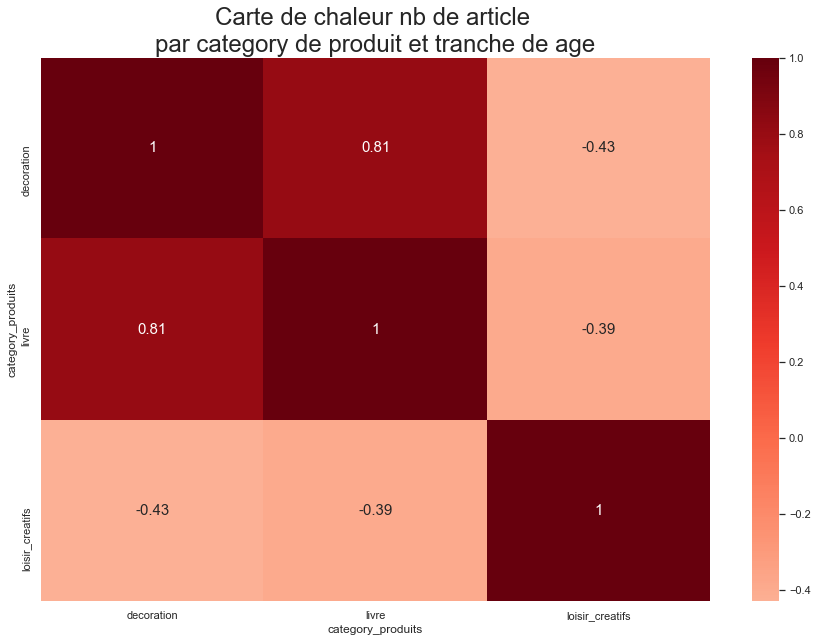

In [125]:
sns.heatmap(nb_article_tranche.corr(), annot=True,annot_kws = {'size':15}, cmap="Reds", center=0)

plt.title("Carte de chaleur nb de article \npar category de produit et tranche de age", size=24)

Le résultat de la méthode corr() est un tableau contenant un grand nombre de chiffres qui représentent la qualité de la relation entre deux colonnes. La plus color fonce c'est plus correlation positive

Le nombre varie de -1 à 1.

1 signifie qu'il existe une relation de 1 à 1 (une corrélation parfaite), et pour cet ensemble de données, chaque fois qu'une valeur augmente dans la première colonne, l'autre augmente également.

0,81 est également une bonne relation, et si vous augmentez une valeur, l'autre augmentera probablement aussi.

-0,39 est également une bonne relation mais en negative sense, ce qui signifie que si une valeur augmente, cela  signifie  que l'autre diminue.





In [126]:
# ici on voit que des femmes sont plus interesse pour livre et decoration
# des hommes pour livre et loisir_creatifs

nb_vente_gendre =pd.DataFrame(transactions_customers.groupby(['category_produits','gendre'])['prix'].sum().unstack('category_produits'))
nb_vente_gendre

category_produits,decoration,livre,loisir_creatifs
gendre,,,
femme,1139168.09,1103465.97,617799.31
homme,1110467.90,1126256.68,701671.40


Text(0.5, 1.0, 'Carte de chaleur nb de ventes \npar gendre et category')

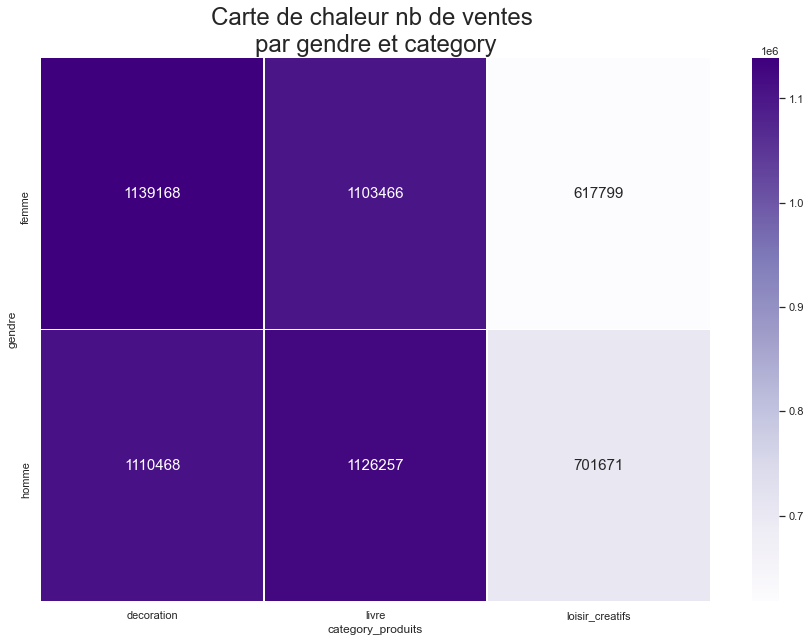

In [127]:
sns.heatmap(nb_vente_gendre, annot=True, cmap="Purples",linewidths =.5,annot_kws = {'size':15},fmt=".0f" )

plt.title("Carte de chaleur nb de ventes \npar gendre et category", size=24)

In [128]:
# Ventes par classement
vente_classement =pd.DataFrame(transactions_customers.groupby(['category_produits','classement_age'])['prix'].sum().unstack('classement_age').fillna(0))
vente_classement

classement_age,1-Jeune Adulte,2-Adulte,3-Cinq_Senior,4-Senior
category_produits,,,,
decoration,295946.24,9.720406e+05,810950.53,170698.61
livre,89108.95,1.715525e+06,352139.69,72949.45
loisir_creatifs,1213580.82,4.356884e+04,54007.86,8313.19


Text(0.5, 1.0, 'Carte de chaleur des ventes \npar classement age et category')

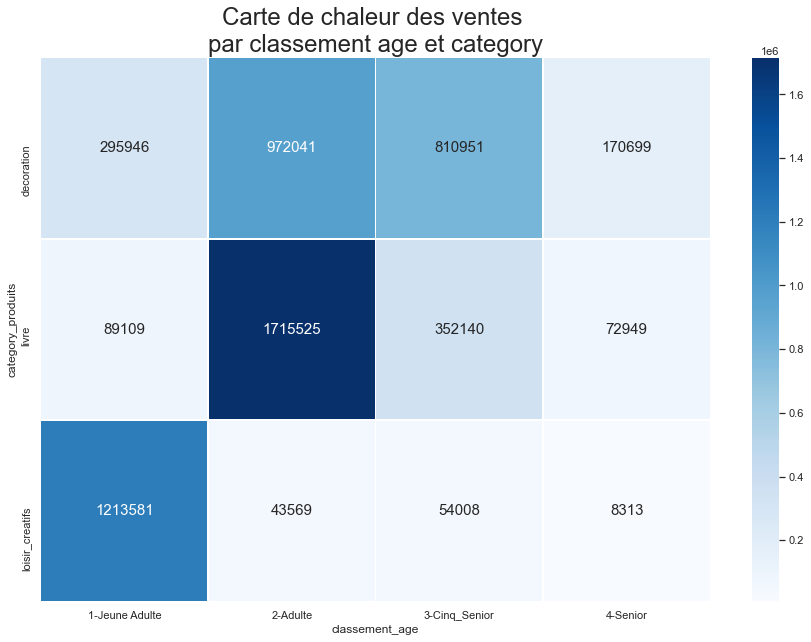

In [129]:
sns.heatmap(vente_classement, linewidths =.5, annot=True,annot_kws = {'size':15}, cmap="Blues", fmt=".0f")
plt.title("Carte de chaleur des ventes \npar classement age et category", size=24)

In [130]:
# Vente/article par mois
vente_mois =pd.DataFrame(transactions_customers.groupby(['m_de_vente','classement_age'])['prix'].count().unstack('classement_age').fillna(0))
vente_mois

classement_age,1-Jeune Adulte,2-Adulte,3-Cinq_Senior,4-Senior
m_de_vente,,,,
1,3518,17314,6995,1489
2,3736,17952,6458,1421
3,3108,17926,6321,1213
4,3168,18149,5955,1143
5,3230,17889,5835,1291
6,3471,16196,5969,1183
7,3723,14228,5620,1145
8,3526,15451,5536,1106
9,2680,22163,6954,1469


Chiffre d affaires sont plus eleve en janvier, novombre et decembre pour le category decoration, mais c'estr a cause de janvier 2022.
Pour le decembre 2021, c'est  a cause de Noel/vacance des chifre des afaires sont eleve pour decoration.

On voit que des category decoration et livre il sont plus eleve que loisir_creatifs, mais que dans le mois octobre loisir_creatifs sont elevee de decoration. 

7 mois pour des chifre des afaires le category decoration donne chifre des affire plus elevée.

Text(0.5, 1.0, 'Chifre_affaires par mois')

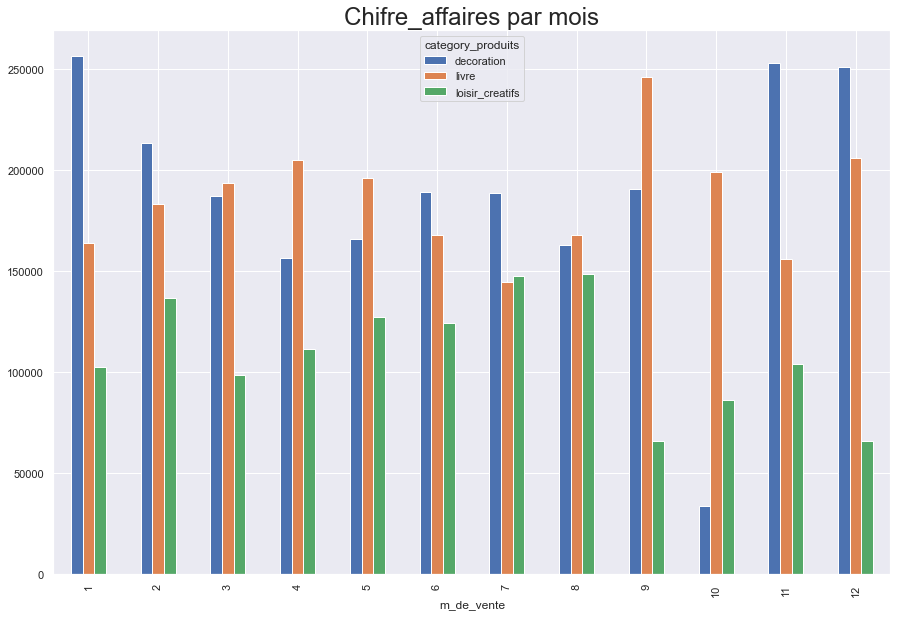

In [131]:

chifre_affaires_mois = chifre_affaires.groupby(['category_produits','m_de_vente'])['prix'].sum().unstack('category_produits')
chifre_affaires_mois.plot(kind='bar')
plt.title("Chifre_affaires par mois", size=24)

Text(0.5, 1.0, 'Chifre_affaires par annee')

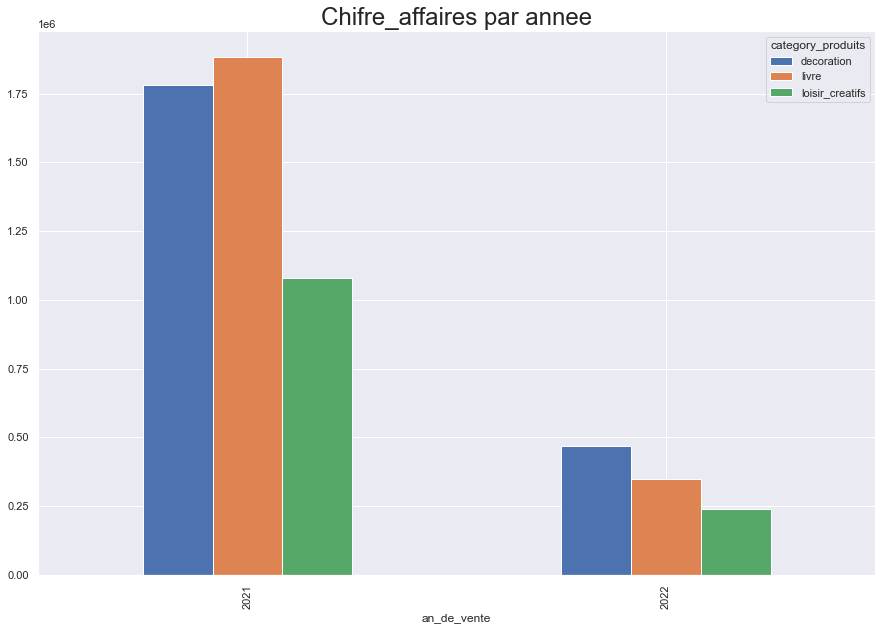

In [132]:


chifre_affaires_annee = chifre_affaires.groupby(['category_produits','an_de_vente'])['prix'].sum().unstack('category_produits')
chifre_affaires_annee.plot(kind='bar')

plt.title("Chifre_affaires par annee", size=24)

On vois que chifre d' affaires 2021 est plus éleve est c'est logique parce que nous n'avons pas les donnes pour tout an 2022

In [133]:
# chiffre d affaires par categorie et an


chifre_affaires_annee.round()

category_produits,decoration,livre,loisir_creatifs
an_de_vente,,,
2021,1779898.0,1882419.0,1080466.0
2022,469738.0,347303.0,239004.0


Text(0.5, 1.0, 'Nb vente par client')

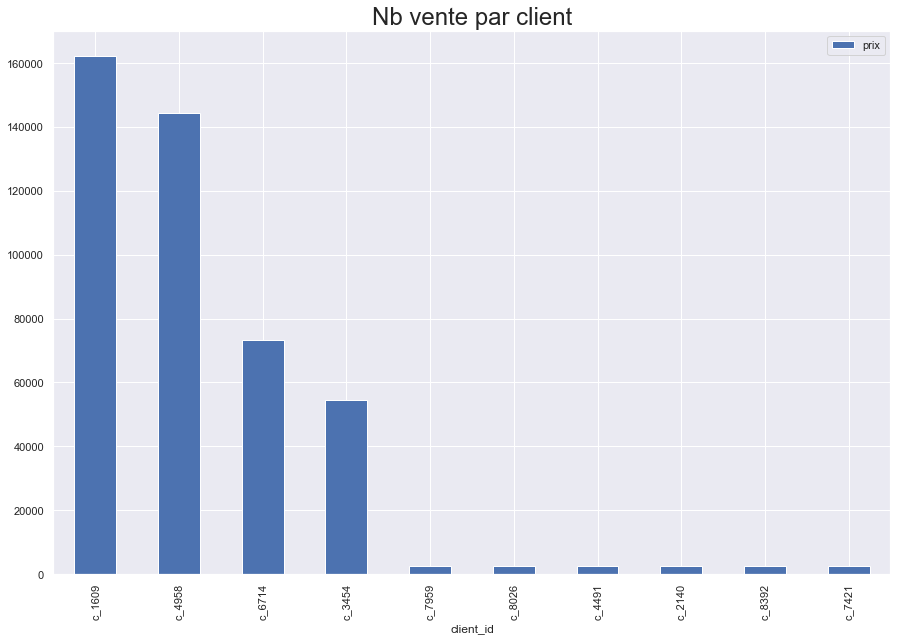

In [134]:
# Nombre de ventes par client
# nous avons une client qui est plus frequente des autres est qui achete plus que les autres


nb_vente_client= pd.DataFrame(chifre_affaires.groupby('client_id')['prix'].sum())
nb_vente_client.sort_values(by='prix', ascending=False).head(10).plot(kind='bar')
plt.title("Nb vente par client", size=24)

In [135]:
nb_article_client= pd.DataFrame(chifre_affaires.groupby('client_id')['prix'].count())
nb_article_client

,prix
client_id,
c_1,20
c_10,28
c_100,6
c_1000,56
c_1001,58
...,...
c_995,8
c_996,42
c_997,23


In [136]:
# nombre article par session

nbre_articles = chifre_affaires.groupby(['session_id']).id_prod.value_counts().unstack().sum(axis=1)
nbre_articles

session_id
s_1        1.0
s_10       1.0
s_100      2.0
s_1000     4.0
s_10000    3.0
          ... 
s_99994    3.0
s_99995    1.0
s_99996    4.0
s_99997    1.0
s_99998    3.0
Length: 169194, dtype: float64

panier moyen par mois et annee

on voit que panier moyen dans juilliet est plus eleve ( period vacance)

panier moyen de septembre et ocotbre sont en baisse

Text(0.5, 1.0, 'Panier moyenne par mois')

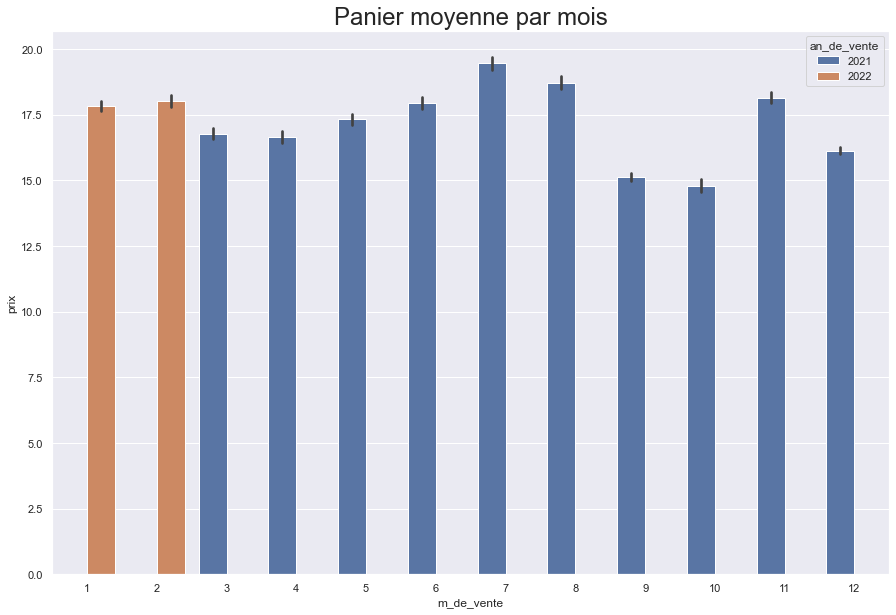

In [137]:


sns.barplot(x ='m_de_vente', y ='prix',hue='an_de_vente', data = chifre_affaires)
plt.title("Panier moyenne par mois", size=24)


In [138]:
frequence_prix = pd.DataFrame(pd.crosstab(chifre_affaires.prix, chifre_affaires.category_produits))
frequence_prix

category_produits,decoration,livre,loisir_creatifs
prix,,,
0.62,0,14,0
0.66,0,8,0
0.77,0,3,0
0.81,0,7,0
0.88,0,3,0
...,...,...,...
233.54,0,0,3
236.99,0,0,94
247.22,0,0,66


In [139]:
df = pd.DataFrame(chifre_affaires.groupby(by=['client_id','prix']).sum().groupby(level=[1]).count())
df

,categ_prod,an_de_vente,m_de_vente,j_de_vente,h_de_vente,min_de_vente,sec_de_vente
prix,,,,,,,
0.62,14,14,14,14,14,14,14
0.66,8,8,8,8,8,8,8
0.77,3,3,3,3,3,3,3
0.81,7,7,7,7,7,7,7
0.88,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...
233.54,3,3,3,3,3,3,3
236.99,84,84,84,84,84,84,84
247.22,64,64,64,64,64,64,64


In [140]:
# dans data frame chifre_affaires le prix 15.99 est plus frequente 3.13% et moins frequente est 103.50


chifre_affaires['prix'].value_counts(normalize=True)*100

15.99     3.136134
4.99      2.792920
10.99     2.656940
3.99      2.586872
5.99      2.456831
            ...   
34.52     0.000297
115.99    0.000297
29.76     0.000297
35.24     0.000297
103.50    0.000297
Name: prix, Length: 1443, dtype: float64

In [141]:
chifre_affaires['j_de_vente'] = chifre_affaires['j_de_vente'].astype("Int64") 


In [142]:
pd.crosstab(transactions_customers['tranche_de_age'], transactions_customers['client_id'])

client_id,c_1,c_10,c_100,c_1000,c_1001,c_1002,c_1003,c_1004,c_1005,c_1006,...,c_990,c_991,c_992,c_993,c_994,c_995,c_996,c_997,c_998,c_999
tranche_de_age,,,,,,,,,,,,,,,,,,,,,
"(17,29]",0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,13,0,0,23,28,0
"(30,49]",0,0,0,0,58,24,49,37,0,143,...,128,26,12,0,0,0,0,0,0,0
"(50,69]",20,28,0,56,0,0,0,0,0,0,...,0,0,0,13,0,8,42,0,0,22
"(70,70+]",0,0,0,0,0,0,0,0,32,0,...,0,0,0,0,0,0,0,0,0,0


--------------------
decoration
moy:
 20.48139978878555
med:
 19.08
mod:
 0    15.99
dtype: float64
var:
 57.23663591000004
ect:
 7.565489799741986


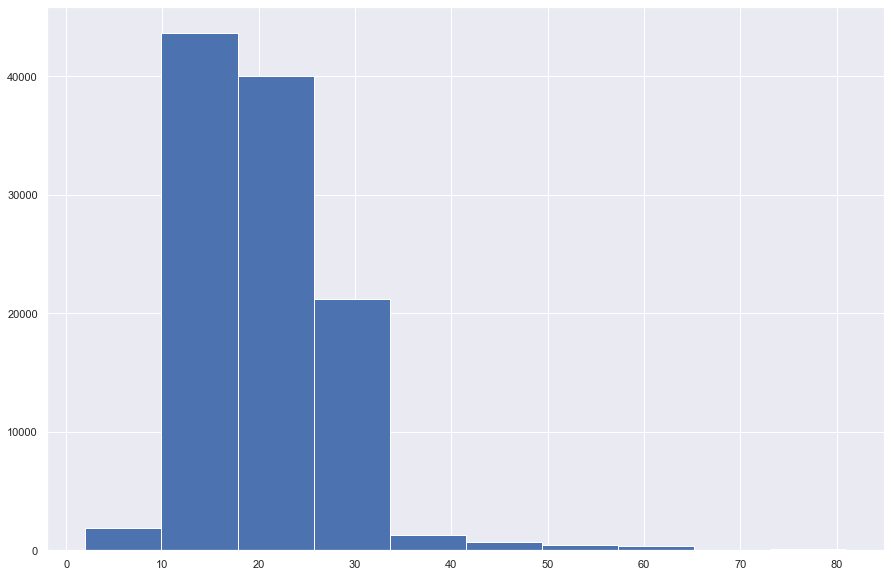

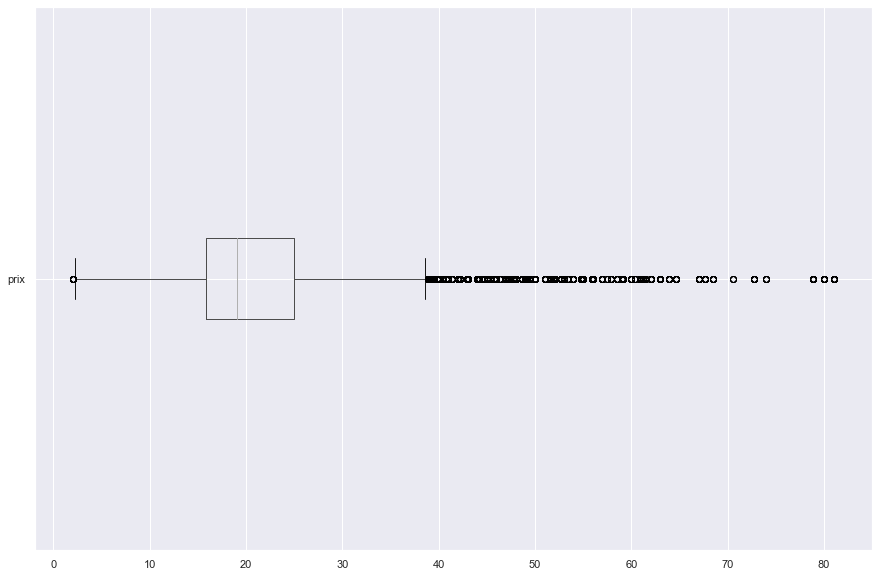

--------------------
livre
moy:
 10.646828235274137
med:
 9.99
mod:
 0    4.99
dtype: float64
var:
 24.30507748634649
ect:
 4.930018000610798


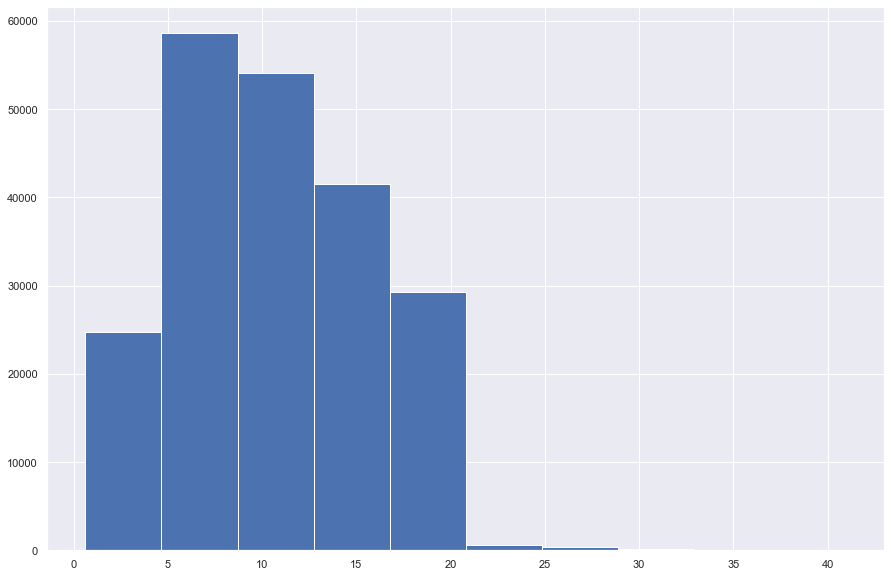

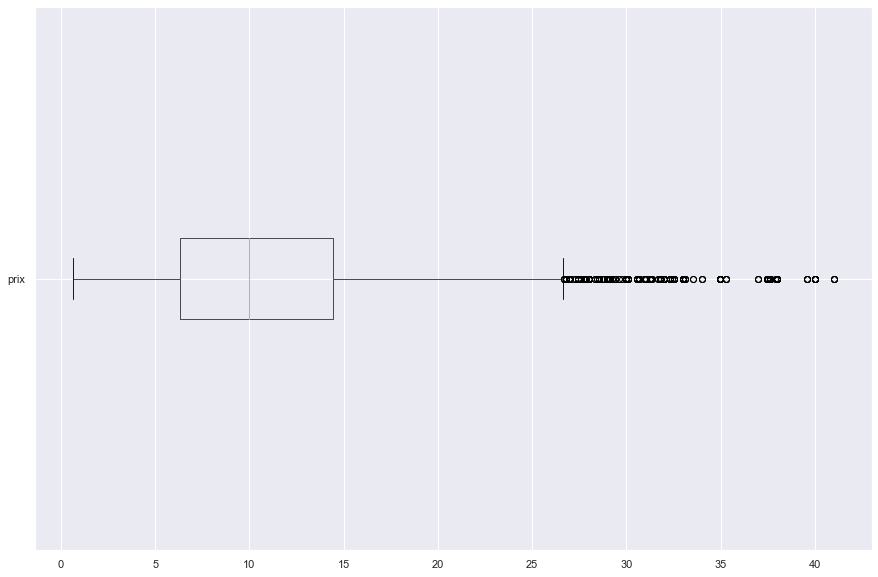

--------------------
loisir_creatifs
moy:
 75.17494929352512
med:
 62.83
mod:
 0    68.99
dtype: float64
var:
 1527.1592950064887
ect:
 39.07888553946349


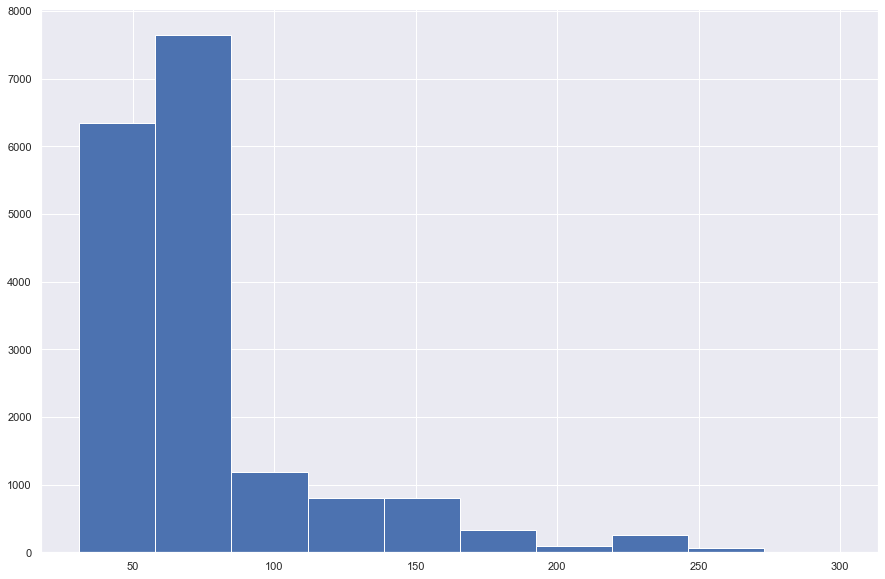

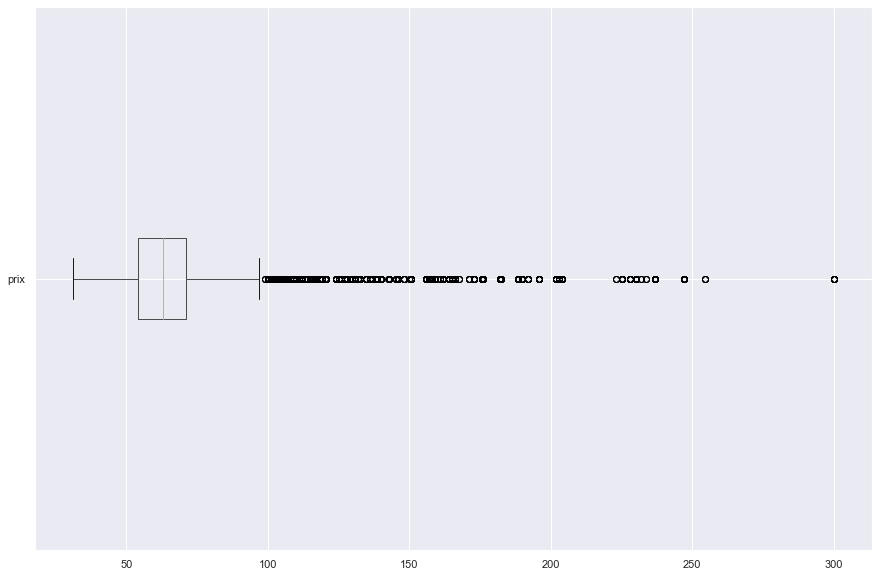

In [143]:
for cat in transactions_customers["category_produits"].unique():
    subset = transactions_customers[transactions_customers.category_produits == cat]
    print("-"*20)
    print(cat)
    print("moy:\n",subset['prix'].mean())
    print("med:\n",subset['prix'].median())
    print("mod:\n",subset['prix'].mode())
    print("var:\n",subset['prix'].var(ddof=0))
    print("ect:\n",subset['prix'].std(ddof=0))
    subset["prix"].hist()
    plt.show()
    subset.boxplot(column="prix", vert=False)
    plt.show()

# Mesures de concentration

In [144]:

effectifs = chifre_affaires["client_id"].value_counts()
modalites = effectifs.index

In [145]:
tab = pd.DataFrame(modalites, columns = ["client_id"])

In [146]:
tab["nb_achat"] = effectifs.values
tab

,client_id,nb_achat
0,c_1609,12855
1,c_6714,4473
2,c_3454,3275
3,c_4958,2562
4,c_2140,195
...,...,...
8595,c_8506,1
8596,c_4478,1
8597,c_8351,1
8598,c_7089,1


In [147]:
tab["f"] = tab["nb_achat"] / len(chifre_affaires)*100
tab

,client_id,nb_achat,f
0,c_1609,12855,3.816624
1,c_6714,4473,1.328025
2,c_3454,3275,0.972341
3,c_4958,2562,0.760653
4,c_2140,195,0.057895
...,...,...,...
8595,c_8506,1,0.000297
8596,c_4478,1,0.000297
8597,c_8351,1,0.000297
8598,c_7089,1,0.000297


In [148]:
tab = tab.sort_values("nb_achat")
tab["F"] = tab["f"].cumsum()
tab

,client_id,nb_achat,f,F
8599,c_4851,1,0.000297,0.000297
8578,c_890,1,0.000297,0.000594
8577,c_6397,1,0.000297,0.000891
8576,c_4391,1,0.000297,0.001188
8575,c_240,1,0.000297,0.001484
...,...,...,...,...
4,c_2140,195,0.057895,93.122358
3,c_4958,2562,0.760653,93.883010
2,c_3454,3275,0.972341,94.855351
1,c_6714,4473,1.328025,96.183376


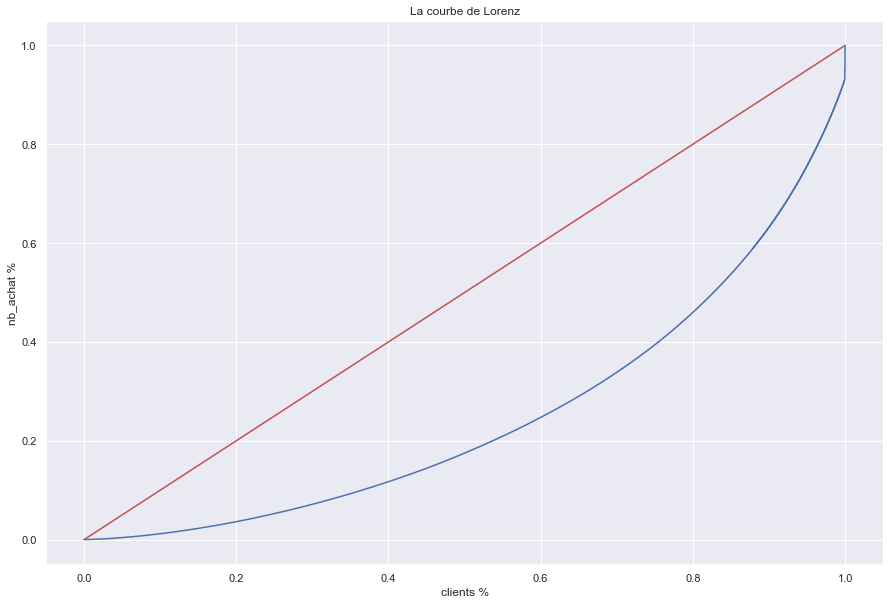

In [149]:

f, ax = plt.subplots()
# Plot line of perfect equality
ax.plot((0,1),(0,1), color='r')

achat = tab[tab['nb_achat'] > 0]
a = achat['nb_achat'].values
lorenz = np.cumsum(np.sort(a)) / a.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.xlabel('clients %')
plt.ylabel('nb_achat %')
plt.title("La courbe de Lorenz")
plt.show()

In [150]:
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.49598991757141964

50 %  (Médiane) clients  donnent vers 17% nombre d'achat ( moins de 20% nb d'achat )  - donc nous avons 50 % clients qui donnent le plus faible precent de nombre d'achat, et 50% clients  presentent vers 80 % de nombre d'achat le plus éleve  

Mé - la valeur de nombre d'achat de client qui a plus ou moins achat

80 % (Ml-médialle) clients donnent vers 45% nombre d'achat et 20% de clients present 45% nombre d'achat 



IG = 0 égalité parfaite 
IG = 1 situation la plus inégalitaire possible 

Indice de Gini il est proche 50 % et nous avons motié inégalite entre clients et nombre d'achat

# CONCLUSION

Selon l'analyse que nous avons fait, nous avons données  pour 2021 et 2022 ( pour les produits, les clients et les transactions ).


Chiffre des affaires 5 798 829.35 euro.

Catégories 0 (livre), 1 (décoration) , 2 (loisir créatifs) et catégories qui est plus visite/fréquente c'est "livre". 
Nous avons le range des prix de 0.62 centimes jusqu’à 300 euros.

A cote de chiffre des affaires 2021 ‘livre’ est plus vendue et pour 2021 c’est décoration ( mais nous avons des donnes pour deux mois 2022)


Evolution des chiffre des affaires par mois on observe  que 
de janvier 2021_2022 catégories 0_livre augmente jusqu mois mai, puis il y a un diminution pendant 4 mois. Et nous avons le plus grand augmentation catégories pour le mois septembre ( c’est à cause des rentrée ) et puis un baisse  pour octobre et novembre. En décembre il y a une augmentation ( noël ).

Catégorie 0_ livre gagnée pendant 11 mois au-dessus 150 000 euros.

Pour le catégories 1_décoration elle avait aussi et augmentation et baisse , mais elle es plus vendue en novembre et décembre ( période noël ).  Même comme la catégories 0 _livre nous avons chiffre des affaire  pendant 11 mois au-dessus 150 000 euros. Octobre il y a un baisse a cause il n’y a pas transactions pour le mois octobre.

Pour le catégories 2_loisir_creatifs chiffre des affaires sont dessous  150 000 euro. Cette catégories elle est plus vendu pendant été ( Juliette et aout ).
Panier moyenne par mois est  plus élevée pendant vacance d’été 18 euro et 19 euro.

Panier moyenne par le catégories 
Livre est 11 euro
Décoration est 20,48 euro
Loisir créatifs  est 75 euro

Nombre de clients est 8599, mais nous avons un gros client avec client _id  c_1609 qui avait 12855 nb vente  - c’est 160 000 euros ( société ) et ensuite cilent_id  c_4958 avec 140 000 euros ( société ).


Catégories livre elle est plus vendu pour le classement Adulte 1 715 525 euros .
Catégories loisir créatifs  est plus vendu pour le Jeune Adulte  1 213 581 euros.
Catégories décoration est plus vendu aussi pour le classement Adulte 972 041 euros.

Nous avons 39 % des clients dans tranche d’âge 30-49 ans.  C’est le nôtre clients plus fréquente. 
Les plus clients sont femmes, mais ce n’est pas très grand  différence. 
Les femmes achètent le plus 1_decoration , les hommes achètent 0_livre. 
